In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches
from IPython.display import display
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, f1_score

# from sklearn import preprocessing
# from sklearn.cluster import KMeans
# from sklearn import metrics
# import networkx as nx
# from sklearn.decomposition import PCA
# import seaborn as sns


## Loading CSVs
#### test 1 = tests-with-FS
#### test 2 = tests-with-TFIDF
#### test 3 = tests-with-TFIDF-inverted-dataset
#### test 4 = tests-with-inverted-dataset-with-FS

In [3]:
PARENT_DIR = os.getcwd().rsplit('/', 1)[0]
OUTPUT_DIR_PATH = os.path.join(PARENT_DIR, "output")

tests_with_FS_path = "tests-with-FS"
tests_with_TFIDF_path = "tests-with-TFIDF"
tests_with_TFIDF_inverted_sets_path = "tests-with-TFIDF-inverted-dataset"
tests_with_FS_inverted_sets_path = "tests-with-inverted-dataset-with-FS"

# report_dirs = [tests_with_TFIDF_path, tests_with_TFIDF_path, tests_with_TFIDF_inverted_sets_path, tests_with_FS_inverted_sets_path]

In [17]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, f1_score

# Read ony the 'xlsx' files of each dir
def get_all_xlsx_files_from_dir(report_dir_name):
    xlsx_files = list()
    report_folder = os.path.join(OUTPUT_DIR_PATH, report_dir_name)
    for file in os.listdir(report_folder):
        report_full_path = os.path.join(report_folder, file)
        if report_full_path.endswith('xlsx'):
            # print(report_full_path)
            # xlsx_files.append(pd.read_excel(report_full_path))
            xlsx_files.append(report_full_path)
            report_full_path
    return xlsx_files

def get_classifiers_metrics(df_scores):
    df_scores = df_scores.iloc[:, -4:]
    return df_scores.to_dict(orient='records')[0]



def format_scores(df_pred, classifier):
    y_true = df_pred['Was Selected?']
    y_pred = df_pred[classifier]
    scores = {
        'accuracy': accuracy_score(y_true, y_pred), 
        'precision': precision_score(y_true, y_pred), 
        'recall': recall_score(y_true, y_pred), 
        'F1': f1_score(y_true, y_pred)
    }
    return scores


def get_test_reports_with_correct_metrics(report_path):
    predictions_sheet = pd.read_excel(report_path, sheet_name=0)
    # print(predictions_sheet)
    dt_scores = format_scores(predictions_sheet, 'DT_pred')
    svm_scores = format_scores(predictions_sheet, 'SVM_pred')
    return {'pred': predictions_sheet, 'dt': dt_scores, 'svm': svm_scores}


In [57]:
def my_plot(tests, x_labels, metric_type, fig_size=None, title='', v_line=None):

    fontTitle = {'fontname':'Times New Roman',
                'weight' : 'bold',
                'size'   : 16 }
    font = {'fontname':'Times New Roman',
                'size'   : 13 }

    bar_width = 0.35
    # x_labels = ['Test without FS','Test without FS (inverted sets)', 'C']
    x = np.arange(len(x_labels))

    metric_key = None
    metrics = ['accuracy', 'precision', 'recall', 'F1']
    for i in metrics:
        if (metric_type.lower() == i) or (metric_type.upper() == i):
            metric_key = i 
    if metric_key == None:
        raise KeyError

    y1 = list()
    y2 = list()
    for k_fs in tests:
        # print(k_fs)
        # print(tests[k_fs])
        df_test = tests[k_fs]
        y1.append(df_test['dt'][metric_key]) # DT values
        y2.append(df_test['svm'][metric_key]) # SVM values

    x1 = x - bar_width/2
    x2 = x + bar_width/2

    # plt.figure(figsize=(20,10))
    if fig_size:
        # plt.figure(figsize=(20,7.5))
        plt.figure(figsize=fig_size)
    else:
        plt.figure()
        
    if title:
        plt.title("{}: {} comparison".format(title, metric_type), **fontTitle) 

    else:
        plt.title("{} Comparison between tests".format(title), **fontTitle) 

    plt.ylabel('{}'.format(metric_type))
    plt.grid(axis='y', alpha=0.3)

    if v_line:
        plt.axvline(v_line, alpha=0.6, linestyle='--', color='black')

    p1 = plt.bar(x1, y1, width = bar_width, color='#fd6b81') #fffa7c
    p2 = plt.bar(x2, y2, width = bar_width, color='#8092f9') #b3acff 
    _ = plt.xticks(x, x_labels, **font)

    # Add text labels to each bar
    for i, v in enumerate(y1):
        plt.text(i - bar_width/2, v - 0.03, f'{v:.4f}', ha='center', fontsize=9)

    for i, v in enumerate(y2):
        plt.text(i + bar_width/2, v - 0.03, f'{v:.4f}', ha='center', fontsize=9)

    plt.legend((p1[0], p2[0]), ('DT', 'SVM'),loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

### OBS: By analysing the others notebooks, we selected which xlsx files got the best results for each test case and then manually copied the path of the files here

In [28]:
t1_path_k1000 = '/home/mcostalonga/new-home/thesis/git-repo-slr/SLR-Automated_selection_of_studies/output/tests-with-FS/k1000-report-19h02m.xlsx'
t1_path_k2500 = '/home/mcostalonga/new-home/thesis/git-repo-slr/SLR-Automated_selection_of_studies/output/tests-with-FS/k2500-report-19h44m.xlsx'
t1_path_k5000 = '/home/mcostalonga/new-home/thesis/git-repo-slr/SLR-Automated_selection_of_studies/output/tests-with-FS/k5000-report-20h56m.xlsx'

t2_path = '/home/mcostalonga/new-home/thesis/git-repo-slr/SLR-Automated_selection_of_studies/output/tests-with-TFIDF/report-21h37m.xlsx' 

t3_path_k5000 = '/home/mcostalonga/new-home/thesis/git-repo-slr/SLR-Automated_selection_of_studies/output/tests-with-inverted-dataset-with-FS/k5000-report-22h38m.xlsx' 
t3_path_k10000 = '/home/mcostalonga/new-home/thesis/git-repo-slr/SLR-Automated_selection_of_studies/output/tests-with-inverted-dataset-with-FS/k10000-report-16h59m.xlsx'
t3_path_k100000 = '/home/mcostalonga/new-home/thesis/git-repo-slr/SLR-Automated_selection_of_studies/output/tests-with-inverted-dataset-with-FS/k100000-report-11h16m.xlsx' 

t4_path = '/home/mcostalonga/new-home/thesis/git-repo-slr/SLR-Automated_selection_of_studies/output/tests-with-TFIDF-inverted-dataset/report-21h31m.xlsx' 

In [37]:
# Tests with original dataset (testing > training)

LABELS_ORIGINAL_SET = ['T1 - (FS 1k)', 'T1 - (FS 2.5k)', 'T1 - (FS 5k)', 'T2 - (TFIDF only)']
t1_t2_paths = [t1_path_k1000, t1_path_k2500, t1_path_k5000, t2_path]

t1_t2_dfs = dict()
for i, report_full_path in enumerate(t1_t2_paths):
    if report_full_path.endswith('xlsx'):
        t1_t2_dfs[LABELS_ORIGINAL_SET[i]] = get_test_reports_with_correct_metrics(report_full_path)



# Tests with inverted dataset (training > testing)

LABELS_INVERTED_SET = ['T3 - (FS 5k)', 'T3 - (FS 10k)', 'T3 - (FS 100k)', 'T4 - (TFIDF only)']
t3_t4_paths = [t3_path_k5000, t3_path_k10000, t3_path_k100000, t4_path]

t3_t4_dfs = dict()
for i, report_full_path in enumerate(t3_t4_paths):
    if report_full_path.endswith('xlsx'):
        t3_t4_dfs[LABELS_INVERTED_SET[i]] = get_test_reports_with_correct_metrics(report_full_path)

#### Tests with original dataset (len(testing) >>> len(training)) ~ 5k max features

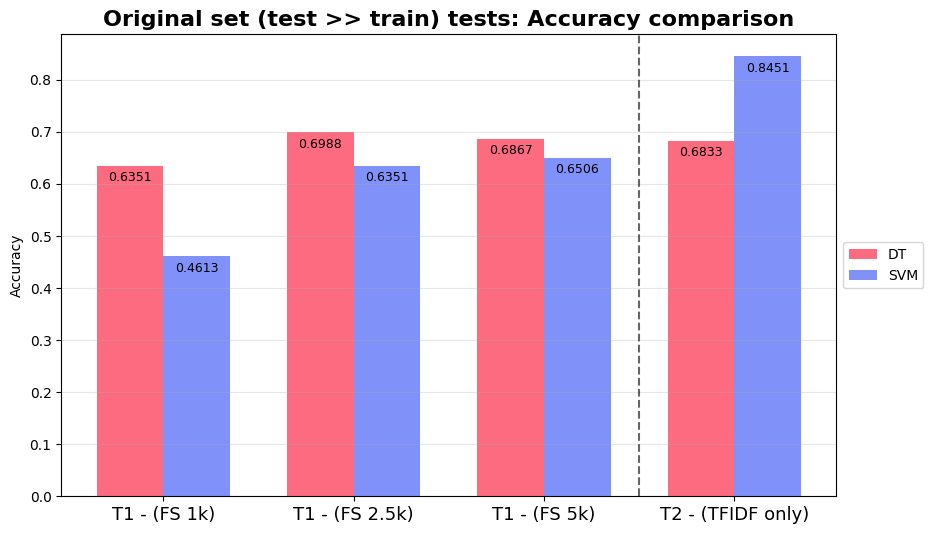

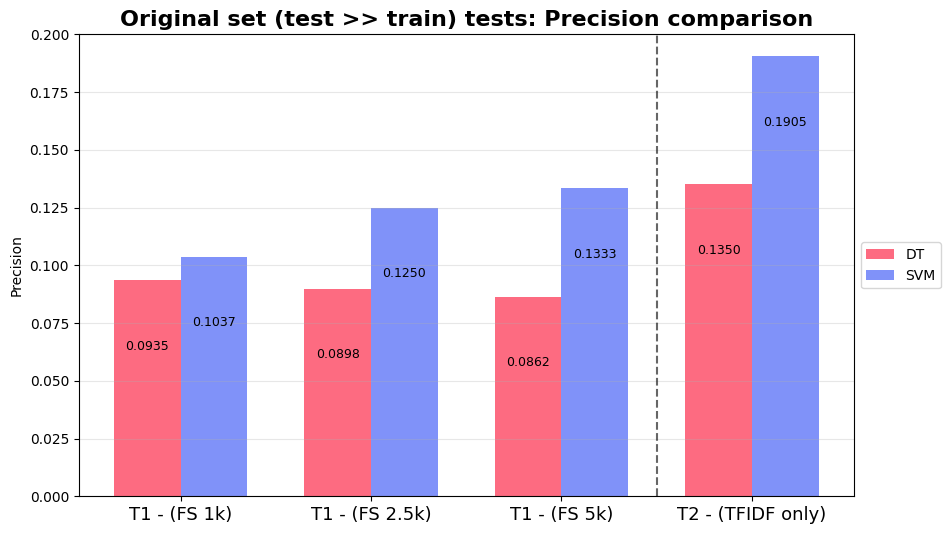

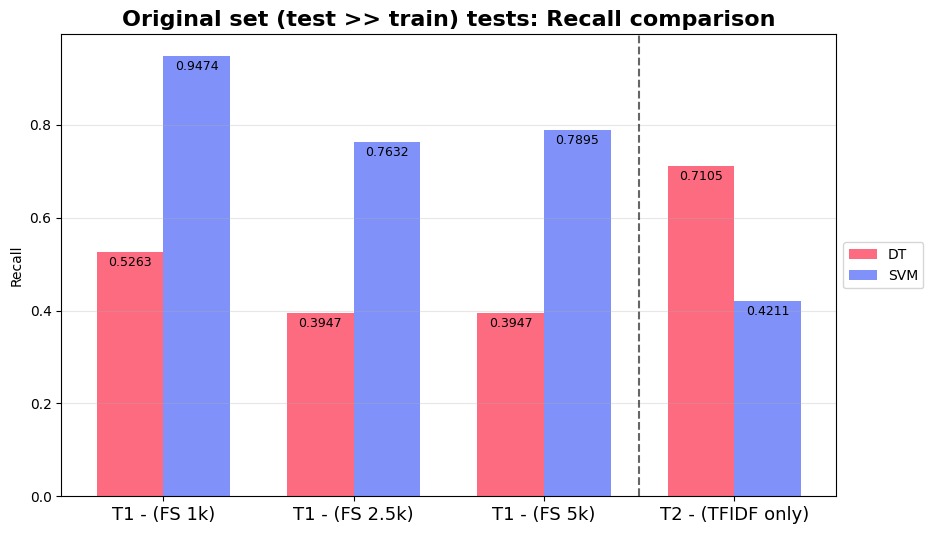

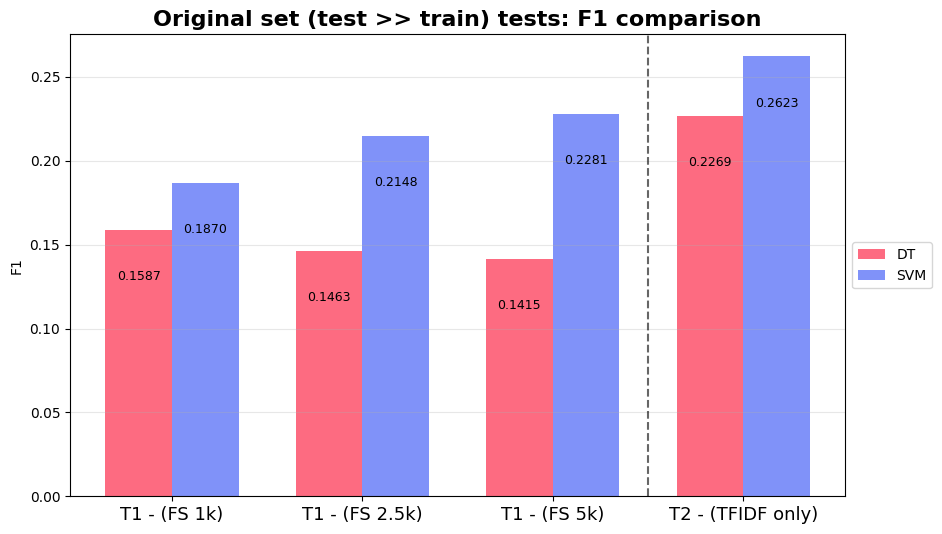

In [58]:
fig_size=(10,6)
title = 'Original set (test >> train) tests'
treshold_line_pos = 2.5
my_plot(t1_t2_dfs, LABELS_ORIGINAL_SET, metric_type='Accuracy', fig_size=fig_size, title=title, v_line=treshold_line_pos)
my_plot(t1_t2_dfs, LABELS_ORIGINAL_SET, metric_type='Precision', fig_size=fig_size, title=title, v_line=treshold_line_pos)
my_plot(t1_t2_dfs, LABELS_ORIGINAL_SET, metric_type='Recall', fig_size=fig_size, title=title, v_line=treshold_line_pos)
my_plot(t1_t2_dfs, LABELS_ORIGINAL_SET, metric_type='F1', fig_size=fig_size, title=title, v_line=treshold_line_pos)

#### Tests with original dataset (len(training) >>> len(testing)) ~ 120k max features

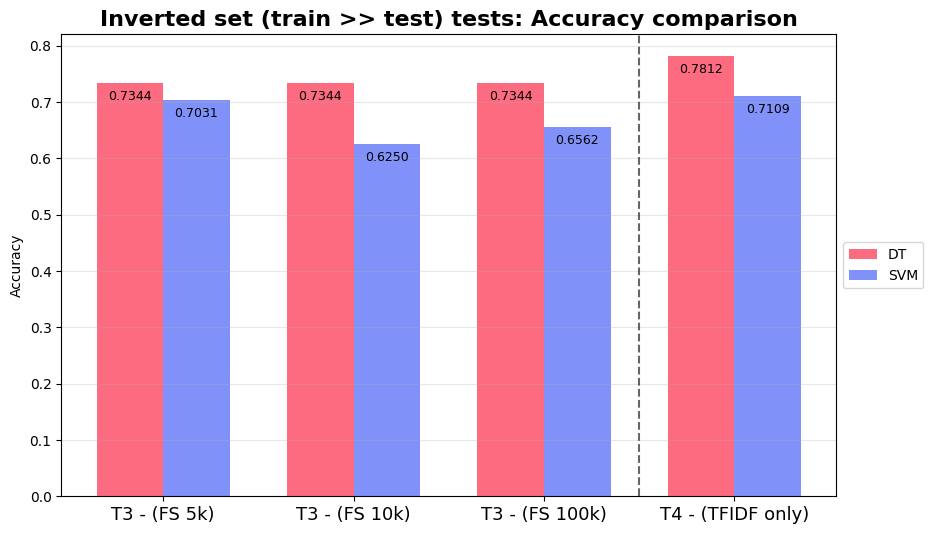

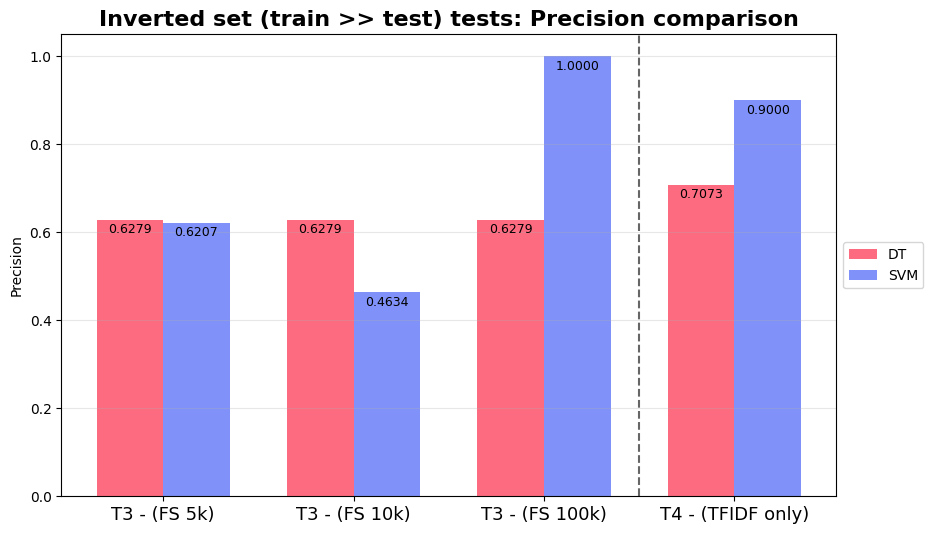

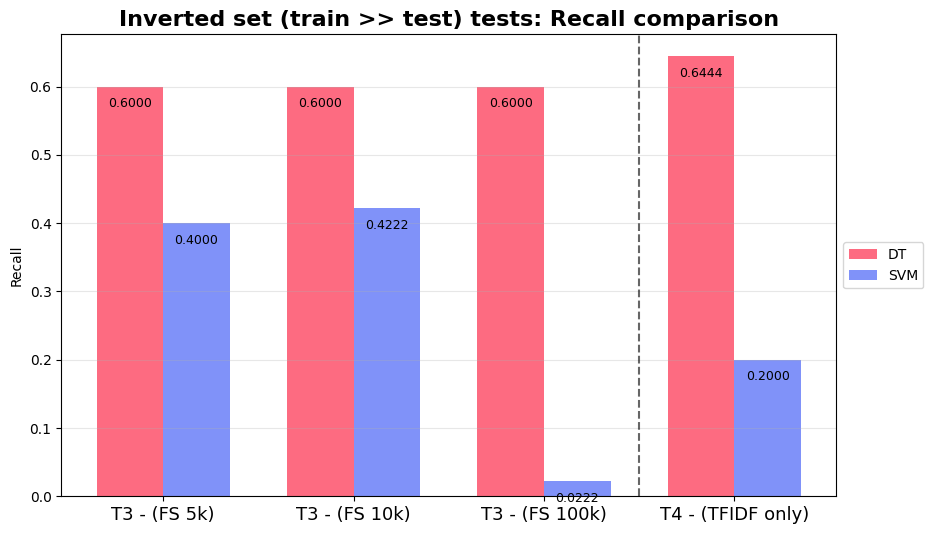

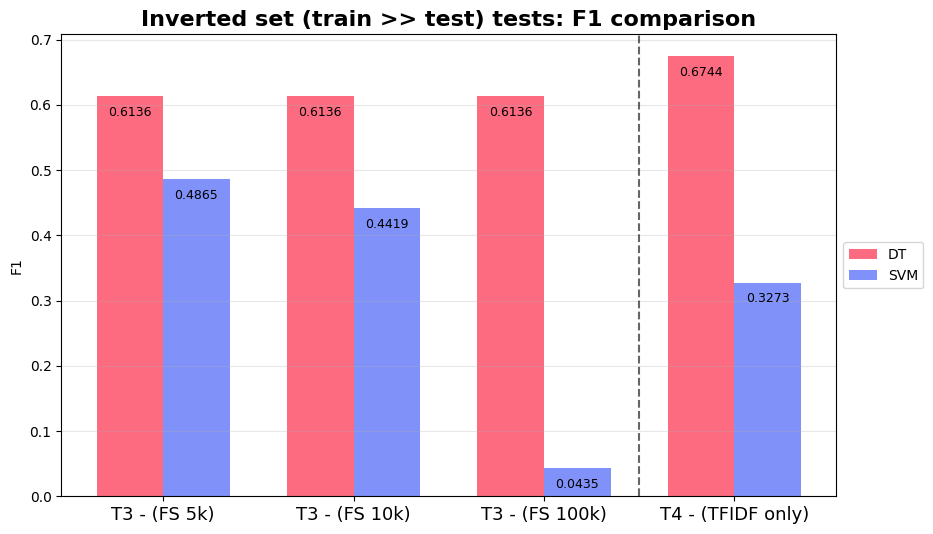

In [59]:
fig_size=(10,6)
title = 'Inverted set (train >> test) tests'
treshold_line_pos = 2.5
my_plot(t3_t4_dfs, LABELS_INVERTED_SET, metric_type='Accuracy', fig_size=fig_size, title=title, v_line=treshold_line_pos)
my_plot(t3_t4_dfs, LABELS_INVERTED_SET, metric_type='Precision', fig_size=fig_size, title=title, v_line=treshold_line_pos)
my_plot(t3_t4_dfs, LABELS_INVERTED_SET, metric_type='Recall', fig_size=fig_size, title=title, v_line=treshold_line_pos)
my_plot(t3_t4_dfs, LABELS_INVERTED_SET, metric_type='F1', fig_size=fig_size, title=title, v_line=treshold_line_pos)

#### All tests combined

In [29]:
LABELS = ['T1 - Original set (FS 1k)', 'T1 - Original set (FS 2.5k)', 'T1 - Original set (FS 5k)', 'T2 - Original set (TFIDF only)', 
          'T3 - Inverted set (FS 5k)', 'T3 - Inverted set (FS 10k)', 'T3 - Inverted set (FS 100k)', 'T4 - Inverted set (TFIDF only)']
all_paths = [t1_path_k1000, t1_path_k2500, t1_path_k5000, t2_path, t3_path_k5000, t3_path_k10000, t3_path_k100000, t4_path]

all_dfs = dict()
for i, report_full_path in enumerate(all_paths):
    if report_full_path.endswith('xlsx'):
        # print(report_full_path)
        all_dfs[LABELS[i]] = get_test_reports_with_correct_metrics(report_full_path)

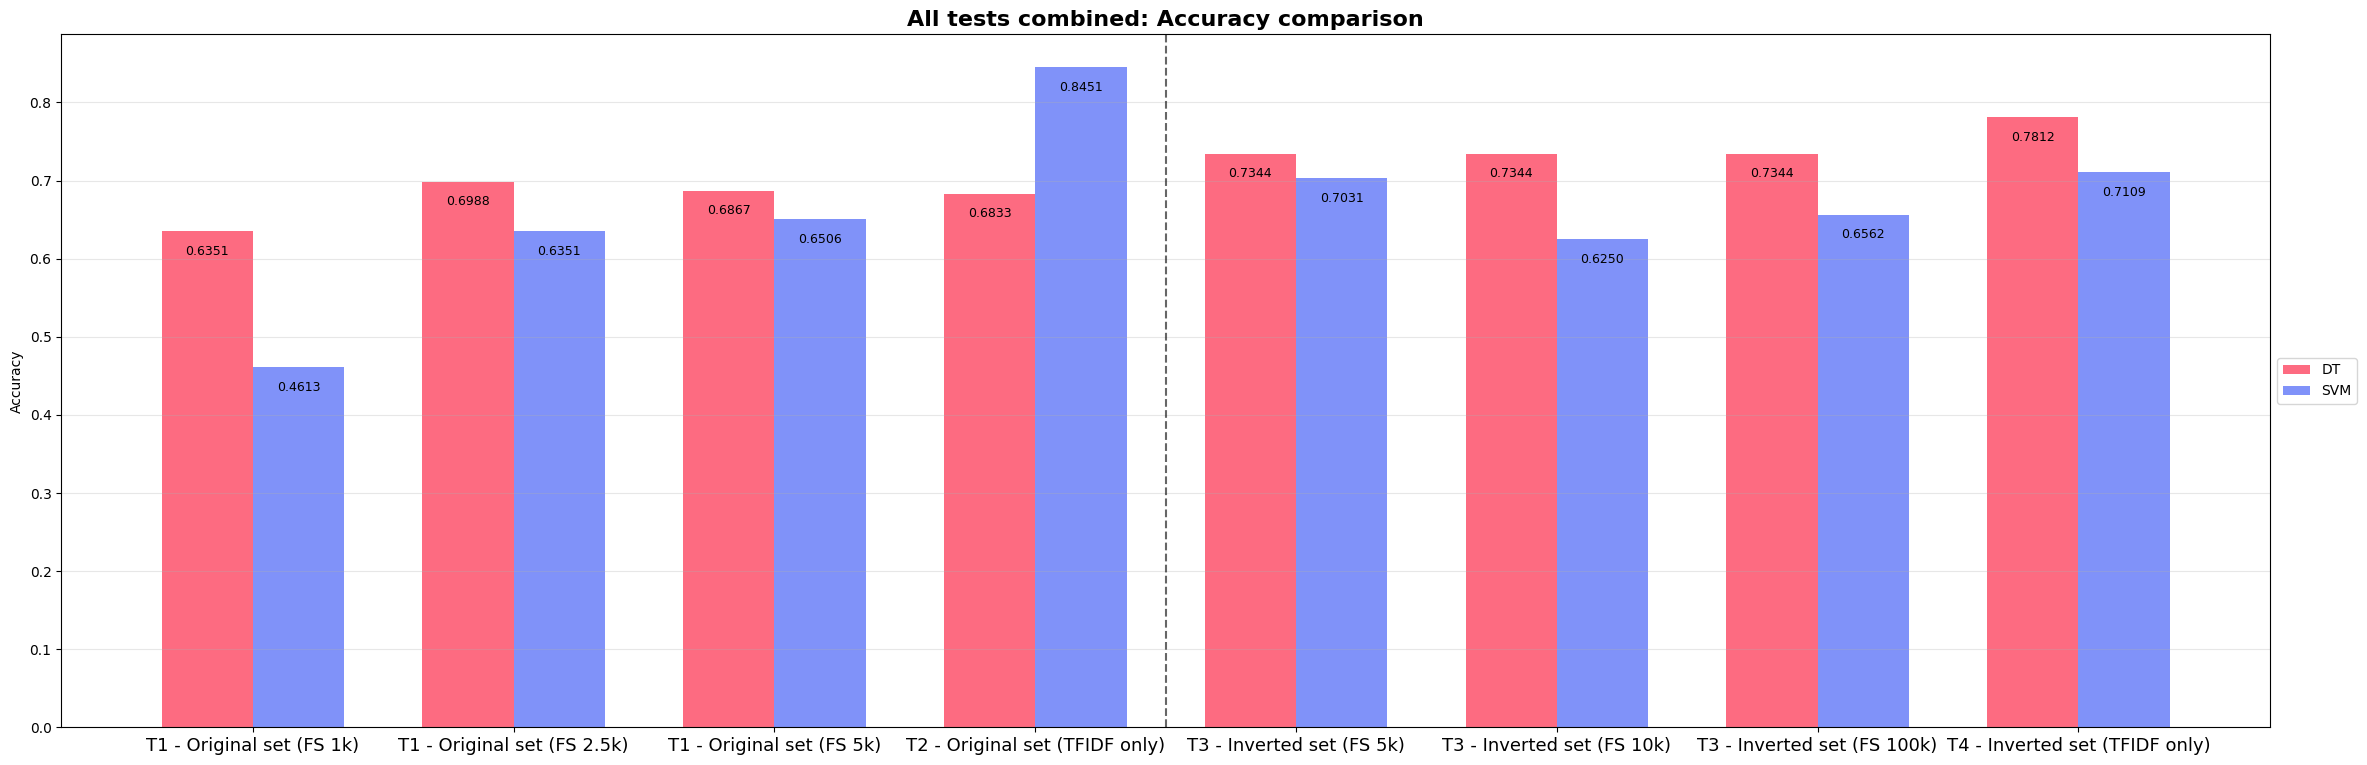

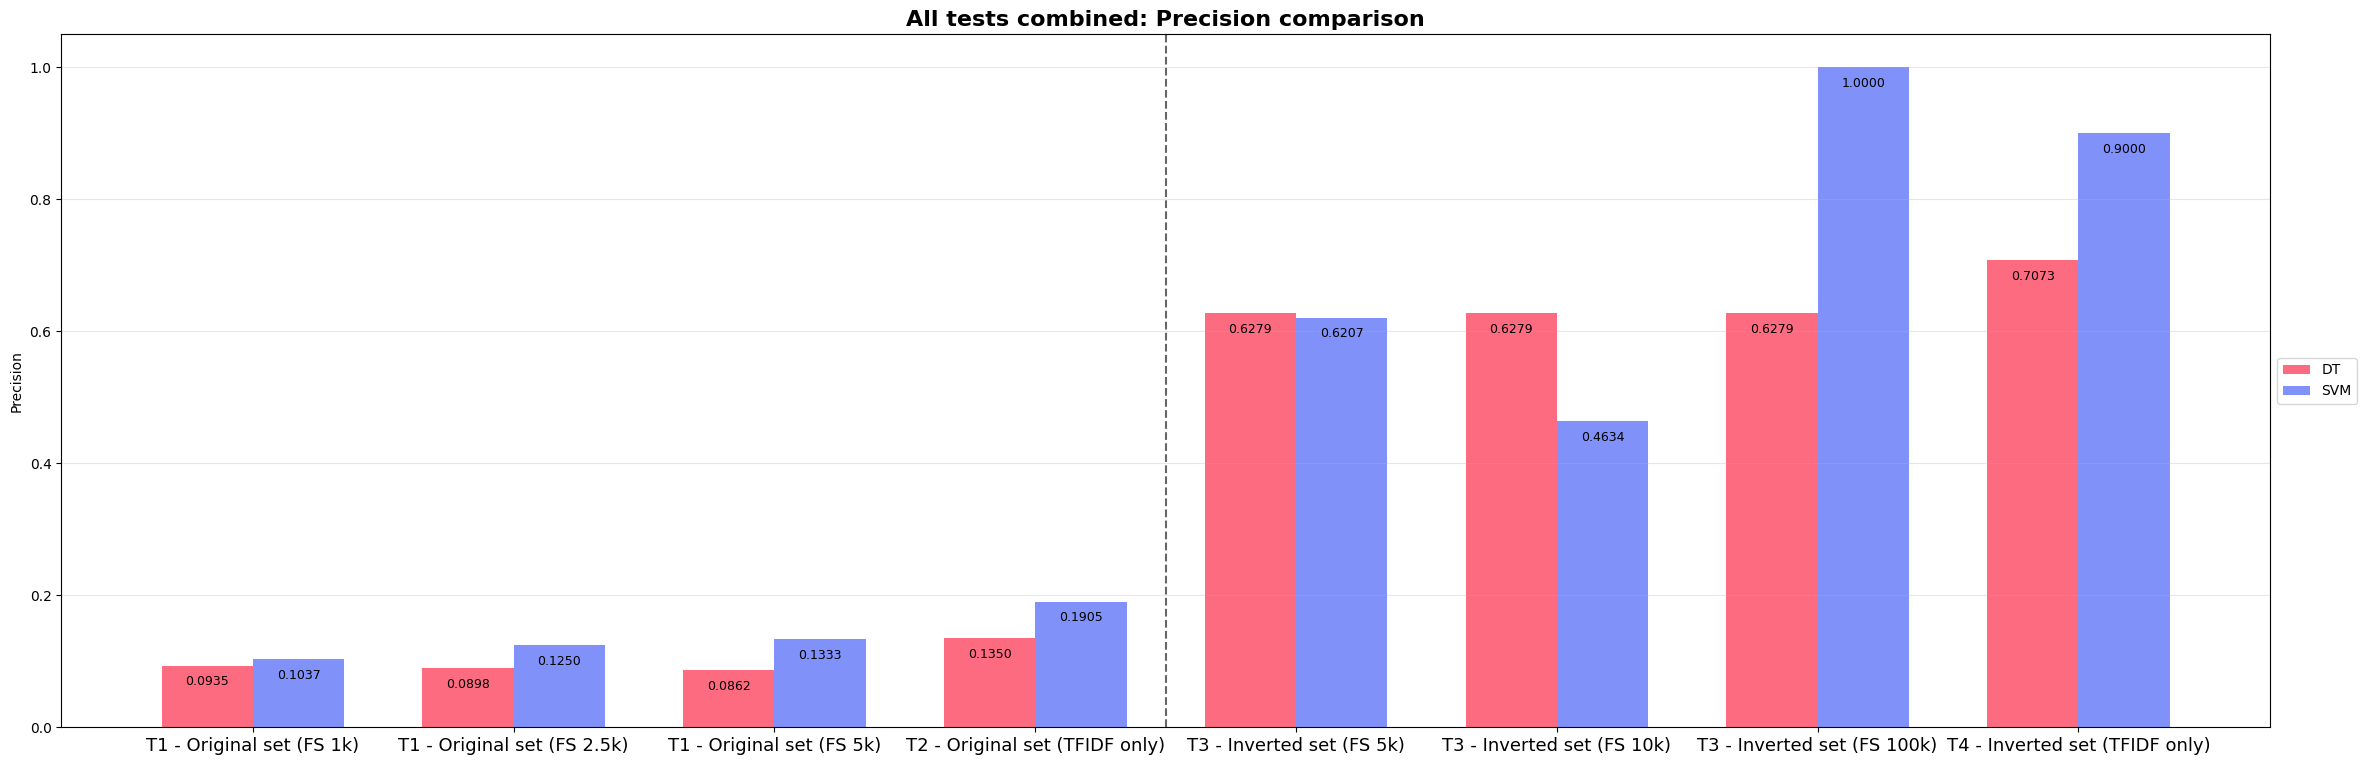

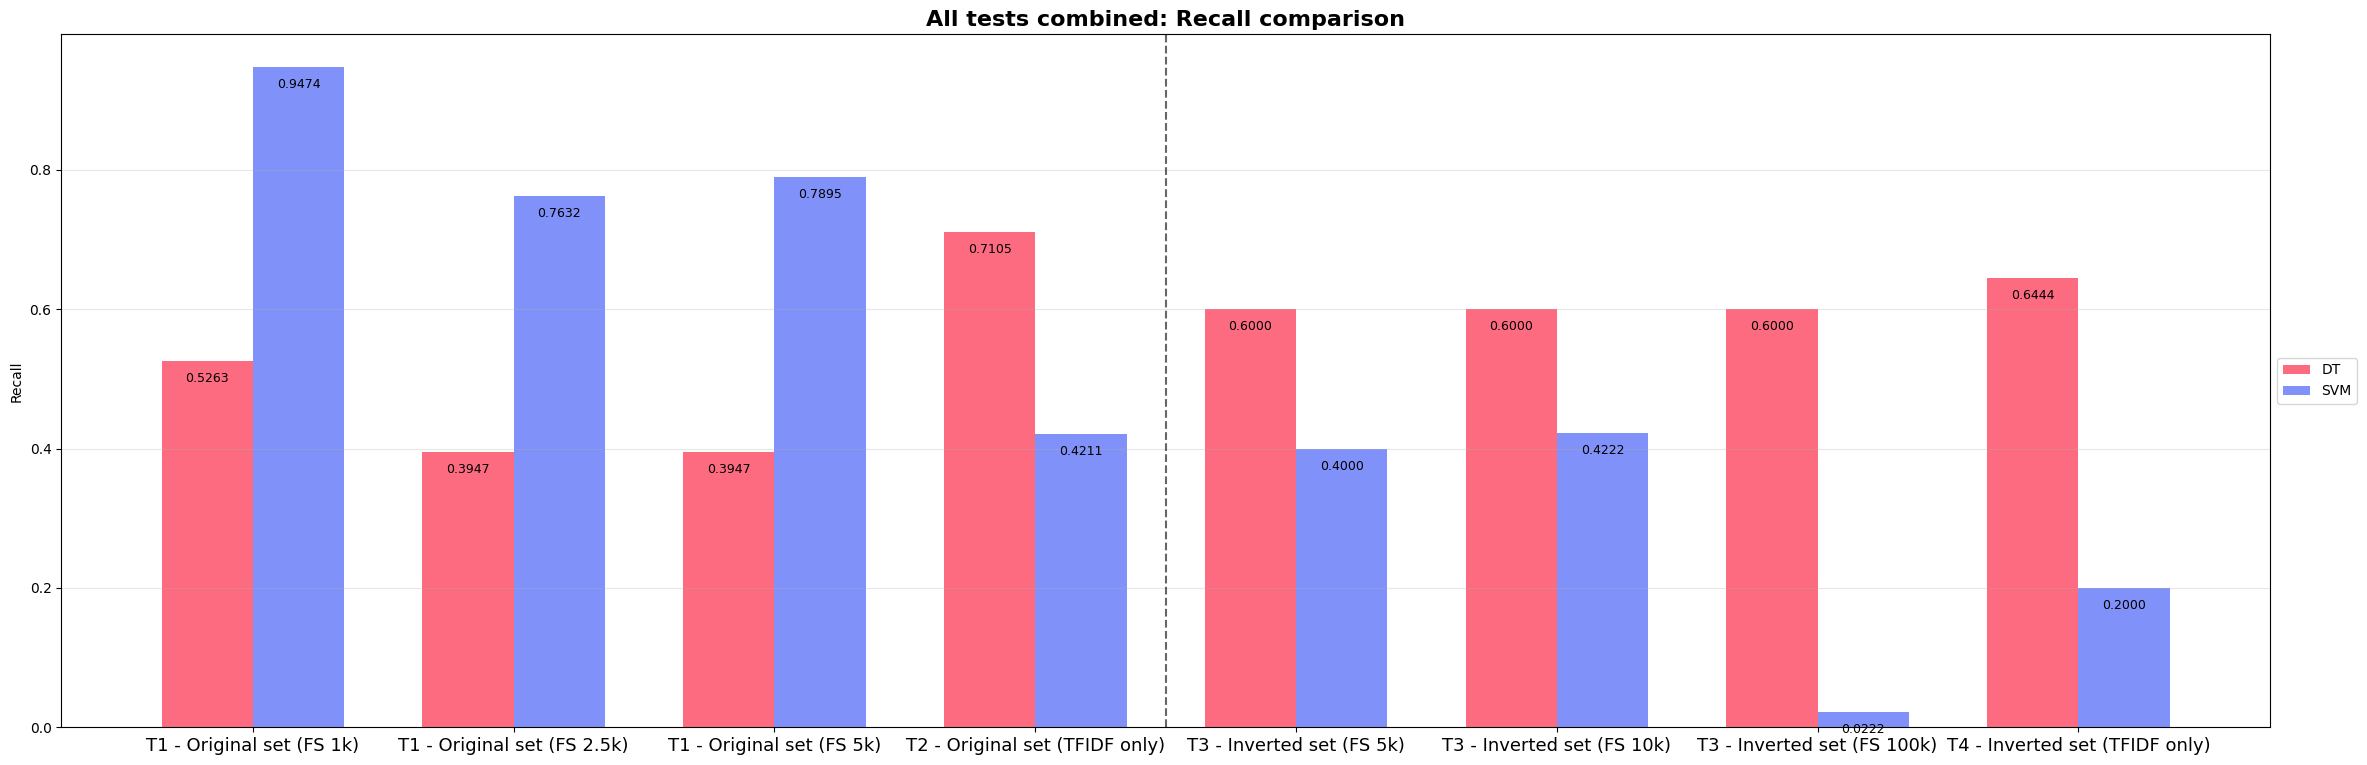

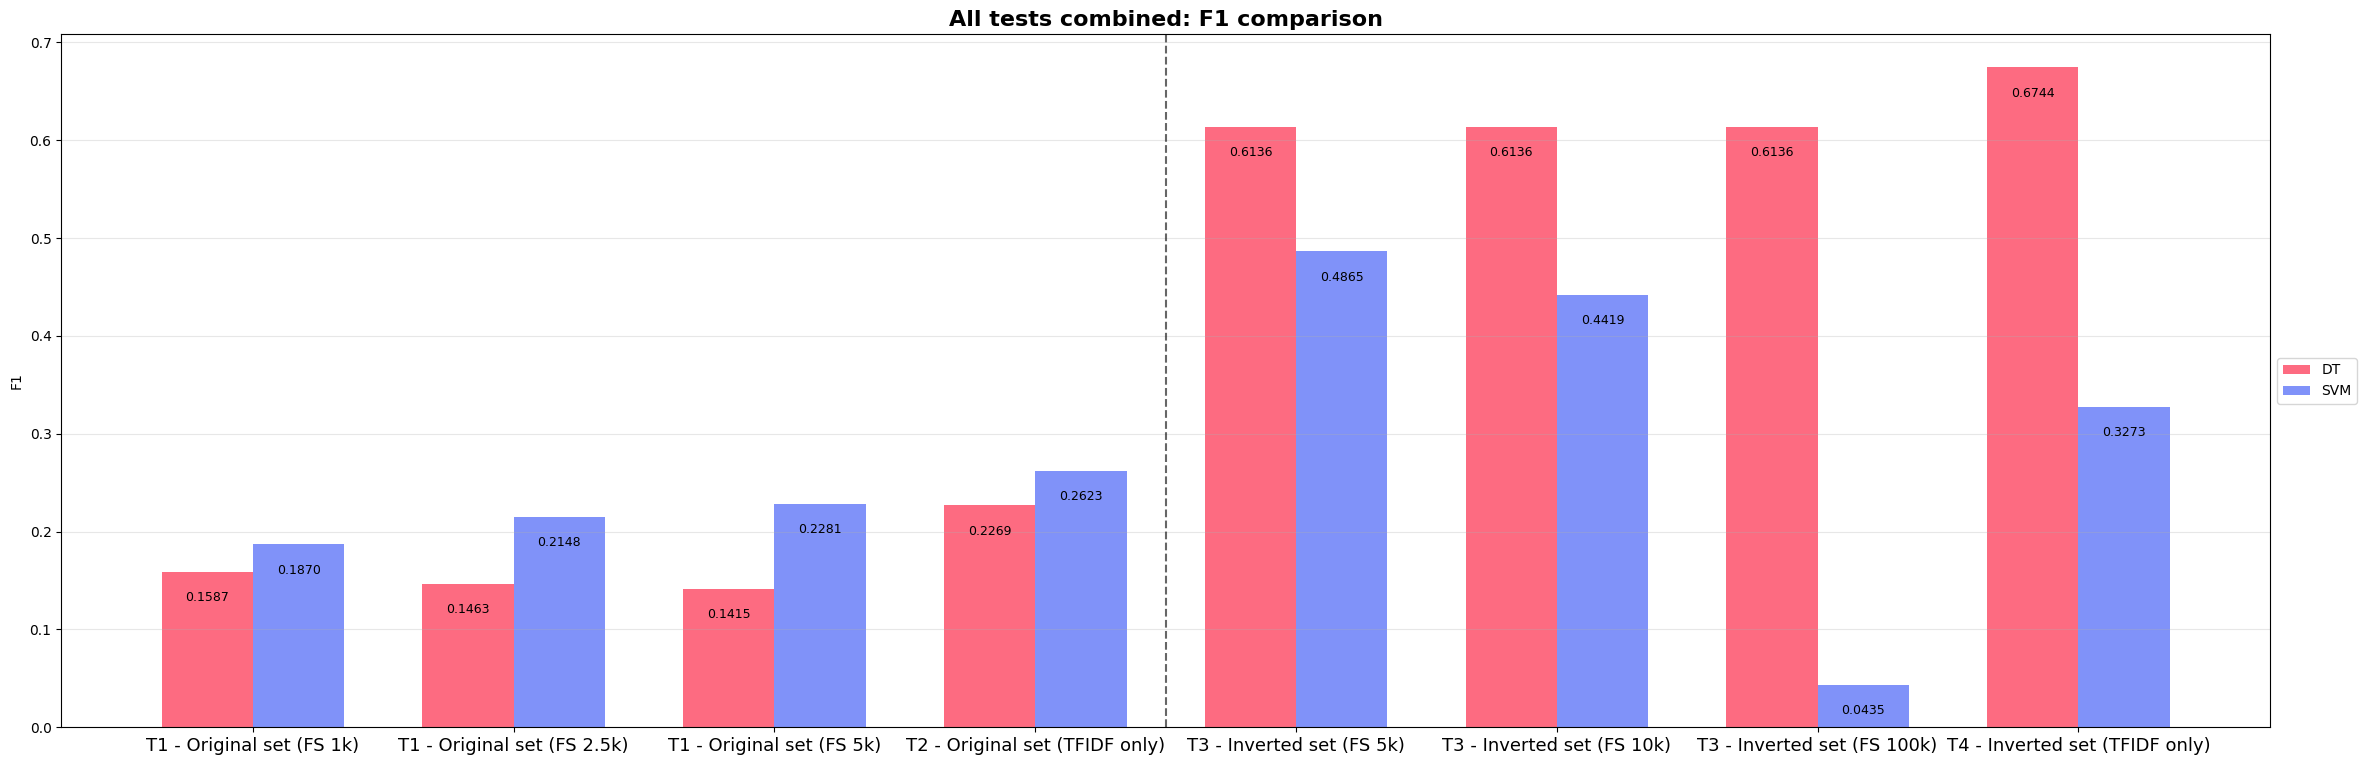

In [66]:
fig_size=(28.5,9)
title = 'All tests combined'
treshold_line_pos = 3.5
my_plot(all_dfs, LABELS, metric_type='Accuracy', fig_size=fig_size, title=title, v_line=treshold_line_pos)
my_plot(all_dfs, LABELS, metric_type='Precision', fig_size=fig_size, title=title, v_line=treshold_line_pos)
my_plot(all_dfs, LABELS, metric_type='Recall', fig_size=fig_size, title=title, v_line=treshold_line_pos)
my_plot(all_dfs, LABELS, metric_type='F1', fig_size=fig_size, title=title, v_line=treshold_line_pos)

# END

In [32]:
def get_real_negatives(df: pd.DataFrame, classifier_type: str):
    return df.loc[(df['categories'] == 0) & (df['categories'] == df[classifier_type]), ['titles', 'categories', classifier_type]]

def get_real_positives(df: pd.DataFrame, classifier_type: str):
    return df.loc[(df['categories'] == 1) & (df['categories'] == df[classifier_type]), ['titles', 'categories', classifier_type]]

def get_false_negative(df: pd.DataFrame, classifier_type: str):
    return df.loc[(df['categories'] == 1) & (df[classifier_type] == 0), ['titles', 'categories', classifier_type]]

def get_false_positive(df: pd.DataFrame, classifier_type: str):
    return df.loc[(df['categories'] == 0) & (df[classifier_type] == 1), ['titles', 'categories', classifier_type]]

def analyze_classifier(df: pd.DataFrame, test_title:str=''):
    df['categories'] = df['Was Selected?']
    classifiers = ['DT_pred', 'SVM_pred']
    all_dfs = dict()
    print('\nAnalyzing test: {}'.format(test_title))
    for cls_type in classifiers:
        print('\t {} analysis'.format(cls_type))
        df_real_negatives = get_real_negatives(df, cls_type)
        df_real_positives = get_real_positives(df, cls_type)
        df_false_negative = get_false_negative(df, cls_type)
        df_false_positive = get_false_positive(df, cls_type)
        print('\t\t[{}] Number of Real Negatives:'.format(cls_type), len(df_real_negatives))
        print('\t\t[{}] Number of Real Positives:'.format(cls_type), len(df_real_positives))
        print('\t\t[{}] Number of False Negatives:'.format(cls_type), len(df_false_negative))
        print('\t\t[{}] Number of False Positives:'.format(cls_type), len(df_false_positive))
        all_dfs[cls_type] = {'REAL_NEGATIVES': df_real_negatives, 'REAL_POSITIVES': df_real_positives,
                            'FALSE_NEGATIVES': df_false_negative, 'FALSE_POSITIVES': df_false_positive
        }
        if cls_type == classifiers[0]:
            print('------------------------------------')
    print('------------------------------------------------------------------------------------------------\n')
    # return all_dfs

In [47]:
analyze_classifier(all_dfs[LABELS[1]]['pred'], test_title='Original test without FS')


Analyzing test: Original test without FS
	 DT_pred analysis
		[DT_pred] Number of Real Negatives: 370
		[DT_pred] Number of Real Positives: 27
		[DT_pred] Number of False Negatives: 11
		[DT_pred] Number of False Positives: 173
------------------------------------
	 SVM_pred analysis
		[SVM_pred] Number of Real Negatives: 475
		[SVM_pred] Number of Real Positives: 16
		[SVM_pred] Number of False Negatives: 22
		[SVM_pred] Number of False Positives: 68
------------------------------------------------------------------------------------------------



In [39]:
dt = {
    'TN': 370,  
    'TP': 27, 
    'FN': 11, 
    'FP': 173 
}

svm = {
    'TN': 475,  
    'TP': 16, 
    'FN': 22, 
    'FP': 68 
}

In [43]:
def precision(obj: dict):
    print(obj['TP'] / (obj['TP'] + obj['FP']))

def recall(obj: dict):
    print(obj['TP'] / (obj['TP'] + obj['FN']))

def accuracy(obj: dict):
    print((obj['TP'] + obj['TN']) / (obj['TP'] +  obj['TN'] + obj['FP'] + obj['FN']))


In [45]:
precision(svm)
recall(svm)
accuracy(svm)


0.19047619047619047
0.42105263157894735
0.8450946643717728


In [49]:
precision(dt)
recall(dt)
accuracy(dt)

0.135
0.7105263157894737
0.6833046471600689


In [48]:
def get_test_reports2(report_path):
    predictions_sheet = pd.read_csv(report_path)
    return {'pred': predictions_sheet}


p = '/home/mcostalonga/new-home/thesis/git-repo-slr/SLR-Automated_selection_of_studies/output/tests-with-TFIDF/2nd-test-report-mar_31-14h40m.csv'
tmp_df = get_test_reports2(p)

analyze_classifier(tmp_df['pred'])


Analyzing test: 
	 DT_pred analysis
		[DT_pred] Number of Real Negatives: 355
		[DT_pred] Number of Real Positives: 27
		[DT_pred] Number of False Negatives: 11
		[DT_pred] Number of False Positives: 188
------------------------------------
	 SVM_pred analysis
		[SVM_pred] Number of Real Negatives: 475
		[SVM_pred] Number of Real Positives: 16
		[SVM_pred] Number of False Negatives: 22
		[SVM_pred] Number of False Positives: 68
------------------------------------------------------------------------------------------------

